# Tutorial 5

**Rémy BARBERET
Mélissa BUCZKO
Léo CHARDON
Mathilde CORRADI
Antoine COURCELLE
E5FI groupe 1I**

In [106]:
import os

import numpy as np
import scipy.signal
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
def load_data(filename):
    data = []
    directory = "2nd_test"
    f = os.path.join(directory, filename)
    with open(f, "r") as file:
        lines = file.readlines()
        for line in lines:
            data.append(line.replace("\n", "").split("\t"))
    return np.asarray(data).astype('float64')


In [65]:
first = load_data("2004.02.13.03.02.39")
second = load_data("2004.02.16.14.22.39")
third = load_data("2004.02.18.08.02.39")

### Calculation of the theoretical failure frequencies of the bearing

In [4]:
Pd = 2.815
Bd = 0.331
Nb = 16
B = 0
Frot = 33.33

BPFO = Nb / 2 * (1 - Bd / Pd * np.cos(B)) * Frot
BPFI = Nb / 2 * (1 + Bd / Pd * np.cos(B)) * Frot
BSFT = Pd/Bd * (1 - (Bd/Pd * np.cos(B))**2) * Frot
FTF = 1/2 * (1 - Bd/Pd * np.cos(B)) * Frot

print(f"BPFO: {BPFO} Hz")
print(f"BPFI: {BPFI} Hz")
print(f"BSFT: {BSFT} Hz")
print(f"FTF: {FTF} Hz")


BPFO: 235.28730373001775 Hz
BPFI: 297.9926962699822 Hz
BSFT: 279.53695526232474 Hz
FTF: 14.70545648312611 Hz


### Time-domain analysis

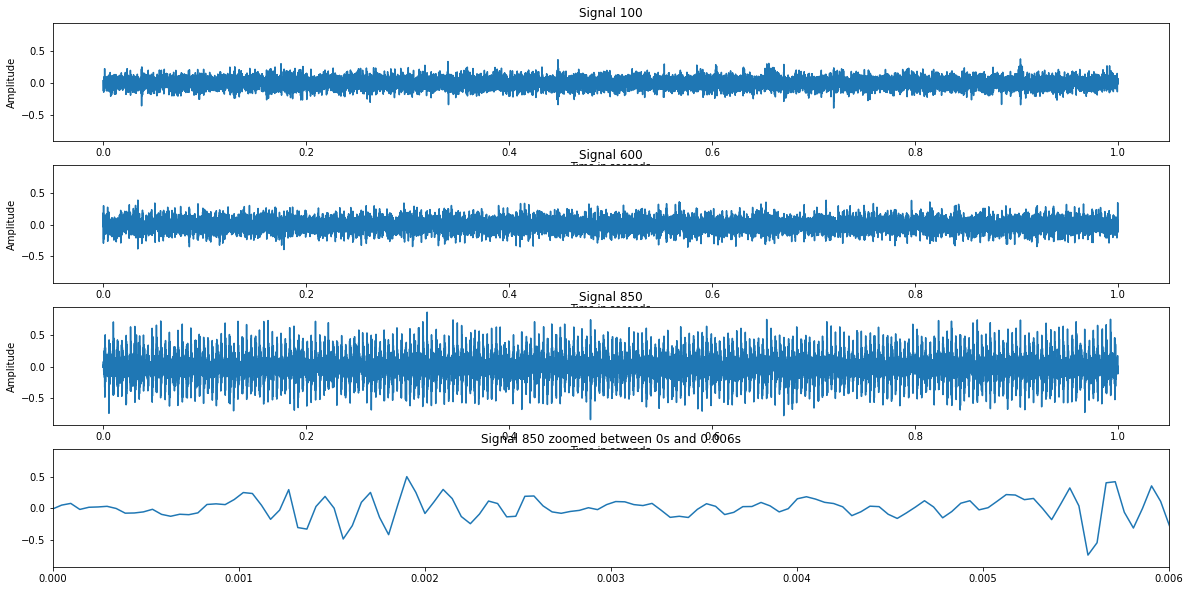

In [148]:
fig, axs = plt.subplots(4, sharex=False, sharey=True, figsize=(20, 10))
axs[0].plot(np.linspace(0, 1, len(first)), first[:, 0])
axs[1].plot(np.linspace(0, 1, len(first)), second[:, 0])
axs[2].plot(np.linspace(0, 1, len(first)), third[:, 0])
axs[3].plot(np.linspace(0, 1, len(first)), third[:, 0])
axs[3].set_xlim(0, 0.006)
axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
axs[3].set_title("Signal 850 zoomed between 0s and 0.006s")
for i in range(3):
    axs[i].set_xlabel("Time in seconds")
    axs[i].set_ylabel("Amplitude")

First of all, we can say that the amplitude of signal number 100 is lower than the amplitude of signal 850.

To determine the fault period Td, we zoom in the third signal (signal 850) between 0 and 0.006s.
The fault period, time between two consecutive peaks (one around 0.0018s and the other around 0.0057s) Td is around 0.0039s.
We can deduce : Fd = 1/Td.

In [61]:
Td = 0.0039 
Fd = 1/Td
print(f"Fd = {Fd}Hz")

Fd = 256.4102564102564Hz


The closest fault frequency to Fd is BPFO (235Hz).
This bearing has a fault in its outer race.


### Frequency domain analysis on the spectrum

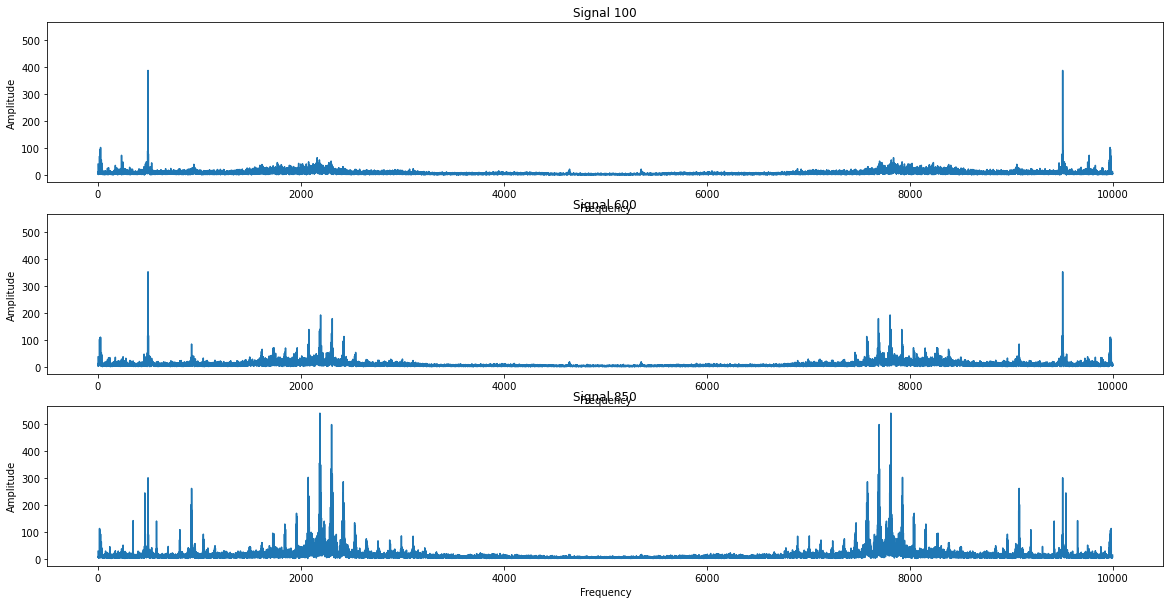

In [101]:
signals = [
    first[:, 0],
    second[:, 0],
    third[:, 0]
]

fig, axs = plt.subplots(3, sharex=False, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    fft = np.fft.fft(signal)
    samples = len(signal)
    axs[i].plot(np.linspace(0, 10000, samples), abs(fft))
    
axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Frequency in Hz")
    axs[i].set_ylabel("Amplitude")


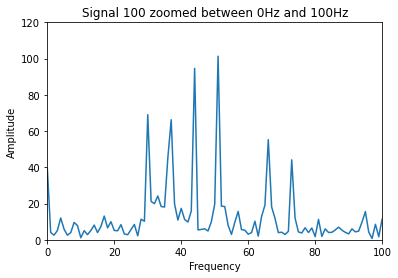

In [115]:
fig = plt.figure()
fft = np.fft.fft(first[:, 0])
samples = len(first[:, 0])
plt.plot(abs(fft))
plt.xlim(0, 100)
plt.ylim(0,120)
plt.title("Signal 100 zoomed between 0Hz and 100Hz")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.show()

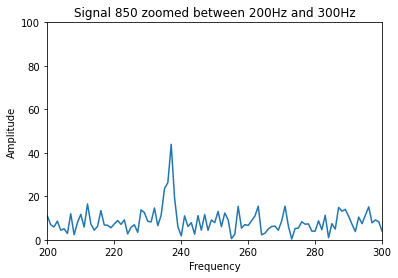

In [117]:
fig = plt.figure()
fft = np.fft.fft(third[:, 0])
samples = len(third[:, 0])
plt.plot(abs(fft))
plt.xlim(200, 300)
plt.ylim(0,100)
plt.title("Signal 850 zoomed between 200Hz and 300Hz")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.show()

We notice that the fundamental frequency in the first signal (100) is around 50Hz.
Whereas the fundamental frequency in the third signal (850) is around 235Hz which is identical to the bearing fault frequency BPFO and close to the Fd previously found (256Hz).
We have Fd = 235Hz.

### Calculation of the envelope and envelope spectrum

Calculate envelope

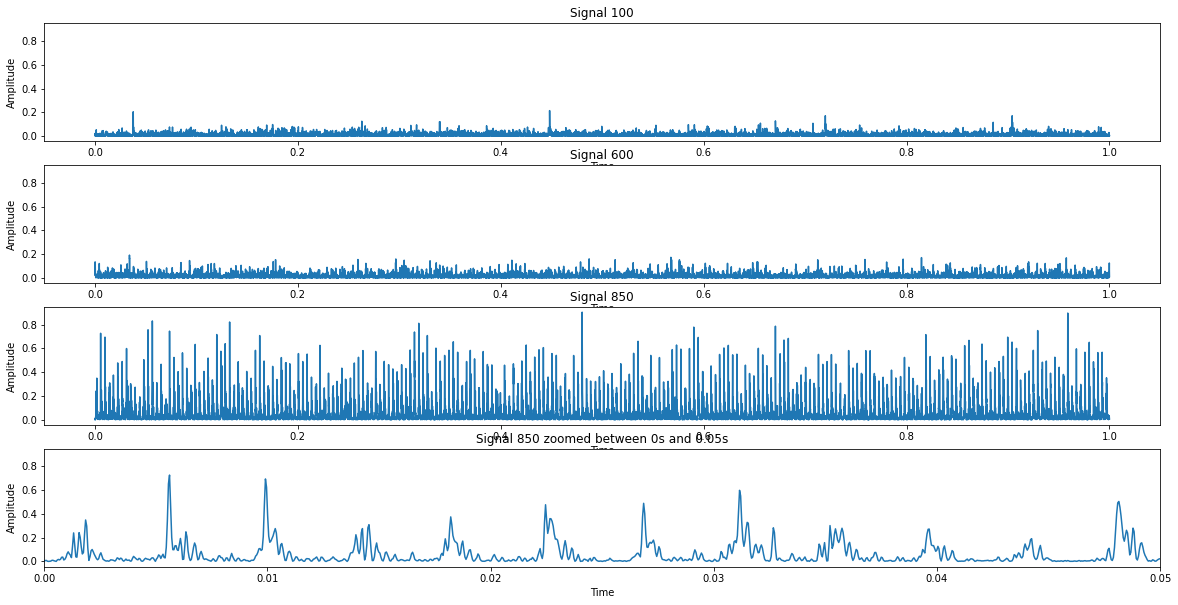

In [146]:
fig, axs = plt.subplots(4, sharex=False, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    samples = len(signal)
    hilbert = scipy.signal.hilbert(signal)
    envelope = np.square(np.abs(hilbert))
    axs[i].plot(np.linspace(0, 1, samples), envelope)

axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
samples = len(third[:, 0])
hilbert = scipy.signal.hilbert(third[:, 0])
envelope = np.square(np.abs(hilbert))
axs[3].plot(np.linspace(0, 1, samples), envelope)
axs[3].set_xlim(0, 0.05)
axs[3].set_title("Signal 850 zoomed between 0s and 0.05s")
for i in range(4):
    axs[i].set_xlabel("Time in s")
    axs[i].set_ylabel("Amplitude")

We can see that in the third signal we have little impacts that we don't see in the first and second signals. It means that we have a bearing fault that happens after the first and second signals.

Envelope spectrum

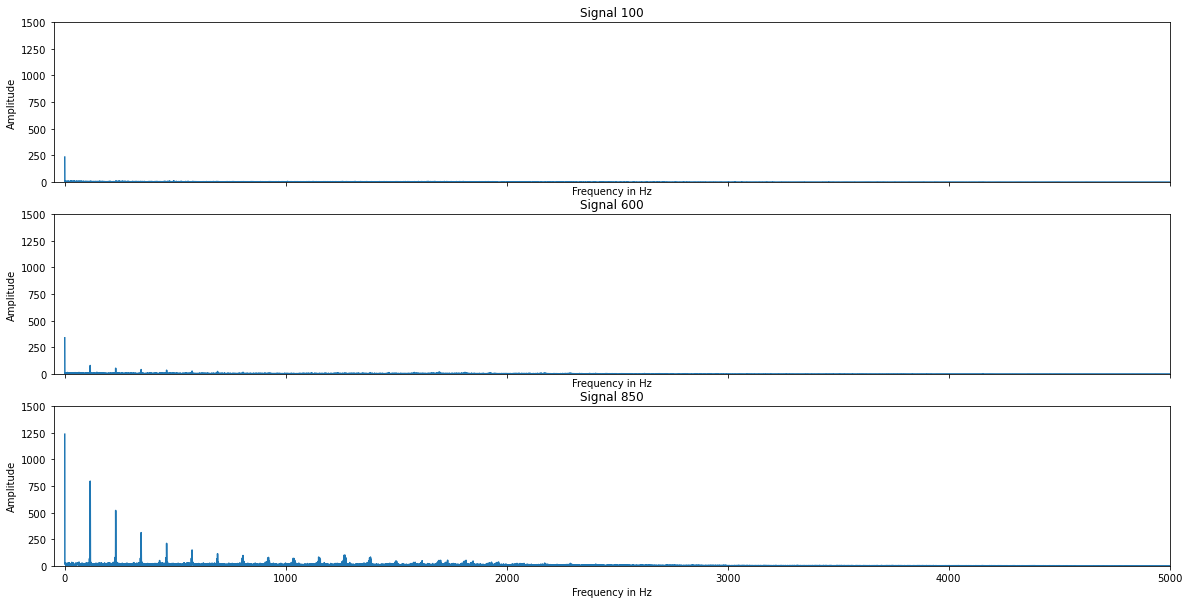

In [165]:
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
for i, signal in enumerate(signals):
    samples = len(signal)
    X_anal = scipy.signal.hilbert(signal)
    envelope = np.square(np.abs(X_anal))
    fft = np.fft.fft(envelope)
    axs[i].plot(np.linspace(0, 10000, samples), abs(fft))
    axs[i].set_xlim(-50, 5000)
    axs[i].set_ylim(0, 1500)

axs[0].set_title("Signal 100")
axs[1].set_title("Signal 600")
axs[2].set_title("Signal 850")
for i in range(3):
    axs[i].set_xlabel("Frequency in Hz")
    axs[i].set_ylabel("Amplitude")


We can see the fault bearing appearing : in the first signal everything seems normal but then, in the second signal harmonics start to show and in the third signal we have many high amplitude harmonics meaning that we have a bearing fault.

### Frequency domain analysis on the envelope spectrum

Text(0, 0.5, 'Amplitude')

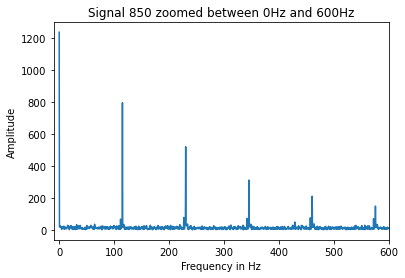

In [166]:
samples = len(third[:, 0])
X_anal = scipy.signal.hilbert(third[:, 0])
envelope = np.square(np.abs(X_anal))
fft = np.fft.fft(envelope)
plt.plot(np.linspace(0, 10000, samples), abs(fft))
plt.xlim(-10,600)
plt.title("Signal 850 zoomed between 0Hz and 600Hz")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")

We can see that we have BPFO harmonic peaks in low frequency range. The amplitude of each peak decreases.

Text(0, 0.5, 'Amplitude')

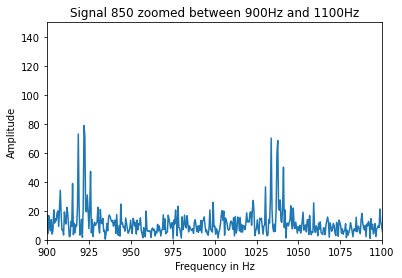

In [154]:
samples = len(third[:, 0])
X_anal = scipy.signal.hilbert(third[:, 0])
envelope = np.square(np.abs(X_anal))
fft = np.fft.fft(envelope)
plt.plot(np.linspace(0, 10000, samples), abs(fft))
plt.xlim(900,1100)
plt.ylim(0, 150)
plt.title("Signal 850 zoomed between 900Hz and 1100Hz")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")

At a high frequency range, we have a natural frequency.